<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/MODULE_3_Exploratory_Data_Analysis_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

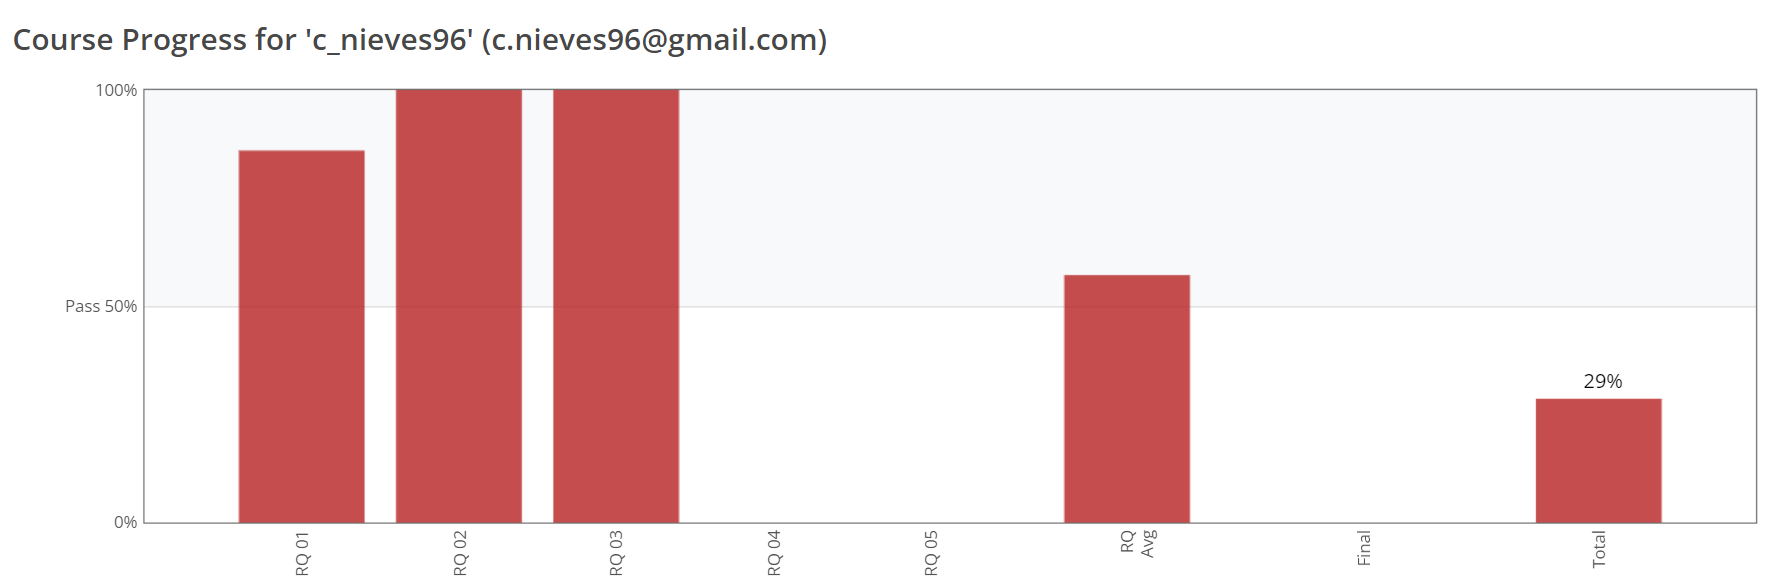

#EXPLORATORY DATA ANLYSIS

      Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
      -summarize main characteristics of the data 
      -gain better understanding of the dataset,
      -uncover relationships between different variables, and
      -extract important variables for the problem we are trying to solve.

##Descriptive Statistics

      Descriptive statistical analysis helps to describe basic features of a dataset and 
      obtains a short summary about the sample and measures of the data. 

###Describe function in pandas

      El siguiente codigo es el que nos da la descripcion de nuestro data frame
          -df.describe()

###Value counts in pandas

      El siguiente codigo cuenta la cantidad de vehiculos que tienen cierta
      caracteristicas de acuerdo a una tabla donde existen 3 tipos de vehiculo
          -fwd
          -rwd
          -4wd
      Donde el nombre de la columna es "drive-wheels" y le cambiamos el nombre para que 
      sea mas facil de visualizar.
      
      drive_wheels_counts=df['drive-wheels'].value_counts()

      drive_wheels_counts.rename(columns={'drive-wheels':'value_counts' inplace=True)
      drive_wheels.counts.index.name='drive-wheels'


###Box plots

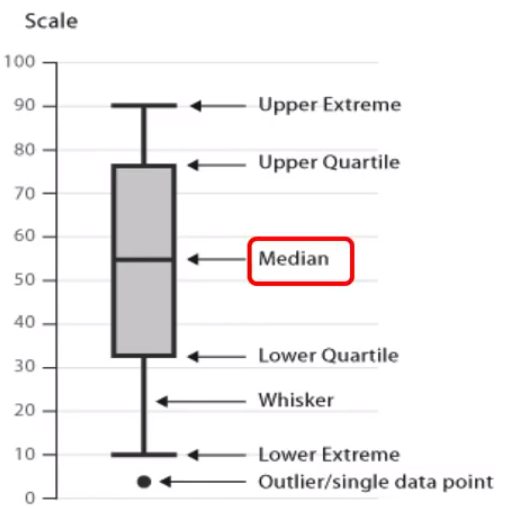

      The main features that the boxplot shows are the median of the data, which represents where
      the middle datapoint is. The Upper Quartile shows where the 75th percentile
      is, the Lower Quartile shows where the 25th percentile is. The data between the Upper
      and Lower Quartile represents the Interquartile Range.
      Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile
      range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
      Finally, boxplots also display outliers as individual dots that occur outside the upper
      and lower extremes. With boxplots, you can easily spot outliers
      and also see the distribution and skewness of the data.

      En el ejemplo de los coches podemos usar box plot para ver la distribucion de las diferentes 
      categorias de "drive-wheels" sobre el precio. Esto lo podemos hacer con el siguiente codigo:

      sns.boxplot(x="drive-wheels", y="price", data=df)

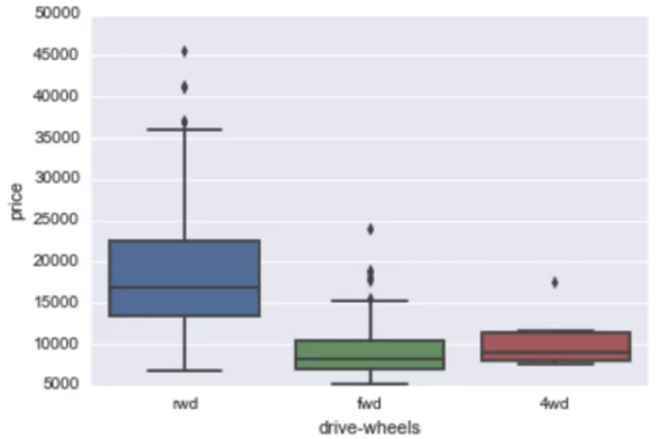

      We can see that the distribution of price
      between the rwd (rear wheel drive) and the other categories are distinct, but the price
      for fwd (front wheel drive) and 4wd (four wheel drive) are almost indistinguishable.

###Scatter Plot

      A veces podemos toparnos con variables continuas como lo puede ser el "tamaño del motor" 
      y el "precio". Si quisieramos entender su relacion podriamos usar "Scatter Plot".

      The predictor variable: is the variable that you are using to predict an outcome. In this 
      case, our predictor variable is the engine size.
      The target variable: is the variable that you are trying to predict. In this case, our
      target variable is the price, since this would be the outcome.

      El codigo para usar scatter plot y nombrar x-axis y y-axis seria el siguiente:

      y=df["engine-size"]
      x=df["price"]
      plt.scatter(x,y)

      plt.title("Scatterplot of Engine Size vs Price")
      plt.xlabel("Engine Size")
      plt.ylabel("Price")

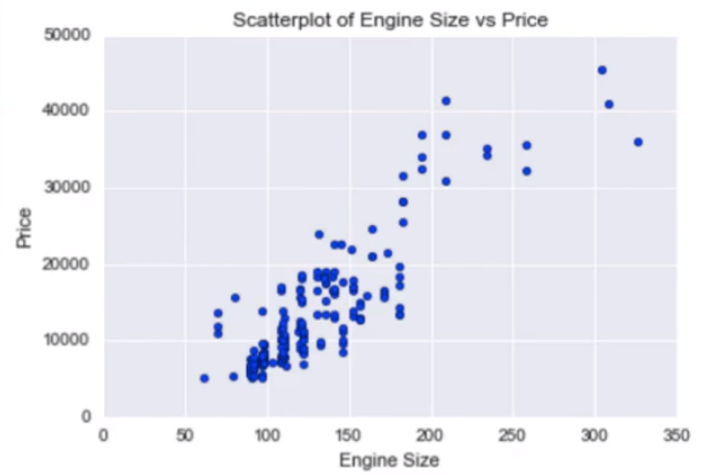

##GroupBy

      The group by method is used on categorical variables, groups the data into subsets according
      to the different categories of that variable.
          -You can group by a single variable
          -you can group by multiple variables by passing
          in multiple variable names.

      Example Groupby()

      Queremos encontrar el precio promedio de los vehiculos y tambien queremos
      observar como este precio promedio varia dependiendo de las variables categoricas 
      "body-style" y "drive-wheels"

      Para lograr esto, usamos el siguiente codigo:

      1.Primero tomamos unicamente las columnas (variables categoricas y el outcome)
      que queremos analizar:
      df_test=df[['drive-wheels','body-style','price']]

      2. Depues agrupamos  por las variables 'drive-wheels' y 'body-style'
      (Since we are interested in knowing how the average price differs across the board, we
      can take the mean of each group and append this bit at the very end of line 2 by setting as_index to False.)
      df_grp=df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()



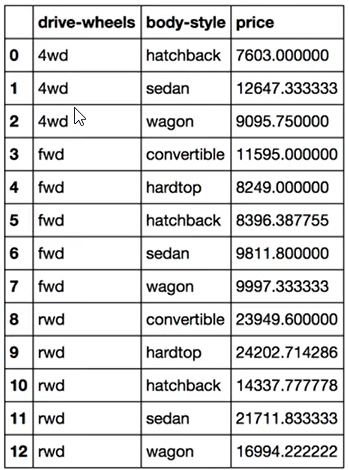

      Para que la visualizacion de la informacion de esta tabla sea mejor, podemos  convertirla a una pivot-table usando el pivot method.

###Pivot Method

      A pivot table has one variable displayed along the columns and the other variable displayed
      along the rows.

      Just with one line of code and by using the pandas pivot method, we can pivot the “body
      style” variable so it is displayed along the columns and the “drive-wheels” will
      be displayed along the rows.

      df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')

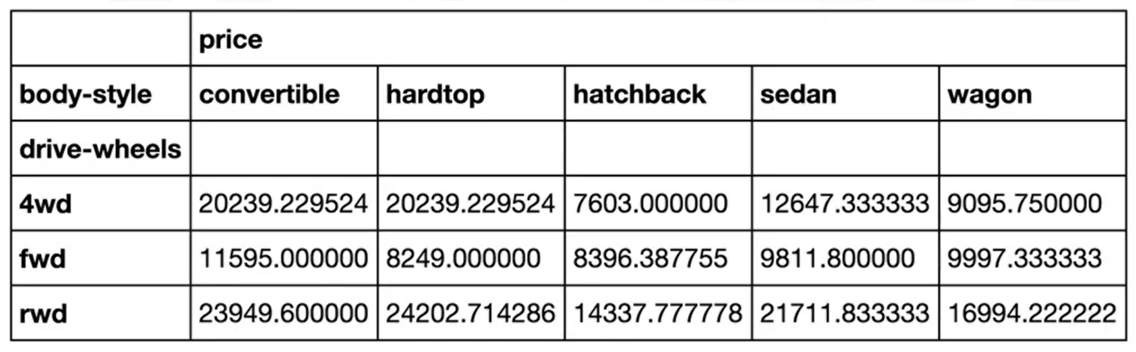

###Heatmap plot

      Heatmap takes a rectangular grid of data and assigns a color intensity based on the
      data value at the grid points.

      Esto lo logramos de la siguiente manera:
      In this example, we use pyplot’s pcolor method to plot a heatmap and convert the
      previous pivot table into a graphical form.
      We specified the Red-blue color scheme.
      In the output plot, each type of “body-style” is numbered along the x-axis, and each type
      of “drive wheels” is numbered along the y-axis.
      The average prices are plotted with varying colors based on their values, according to
      the color bar.

      plt.pcolor(df_pivot,cmap='RdBu')
      plt.colorbar()
      plt.show()


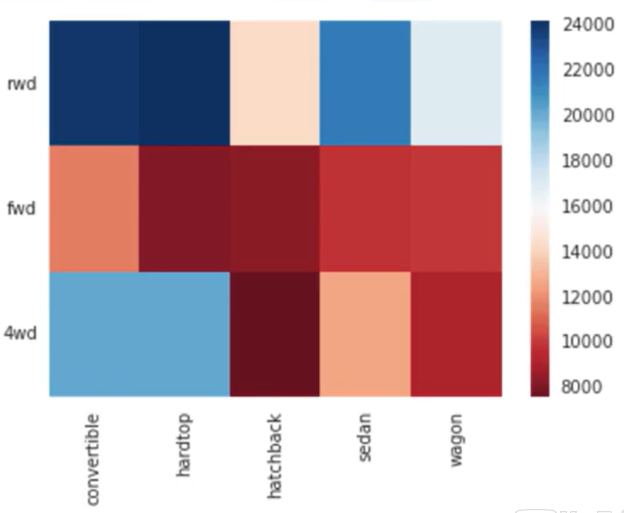

## Analysis of Variance ANOVA

      To analyze categorical variables such as the
      "make" variable, we can use a method such
      as the ANOVA method.
      ANOVA is a statistical test that stands for "Analysis of Variance".
      ANOVA can be used to find the correlation between different groups of a categorical
      variable.

      The ANOVA test returns two values: the F-test score and the p-value.
        -The F-test calculates the ratio of variation between the groups's mean over the variation
          within each of the sample groups.

        -The p-value shows whether the obtained result is statistically significant.

**ANOVA - F-TEST**

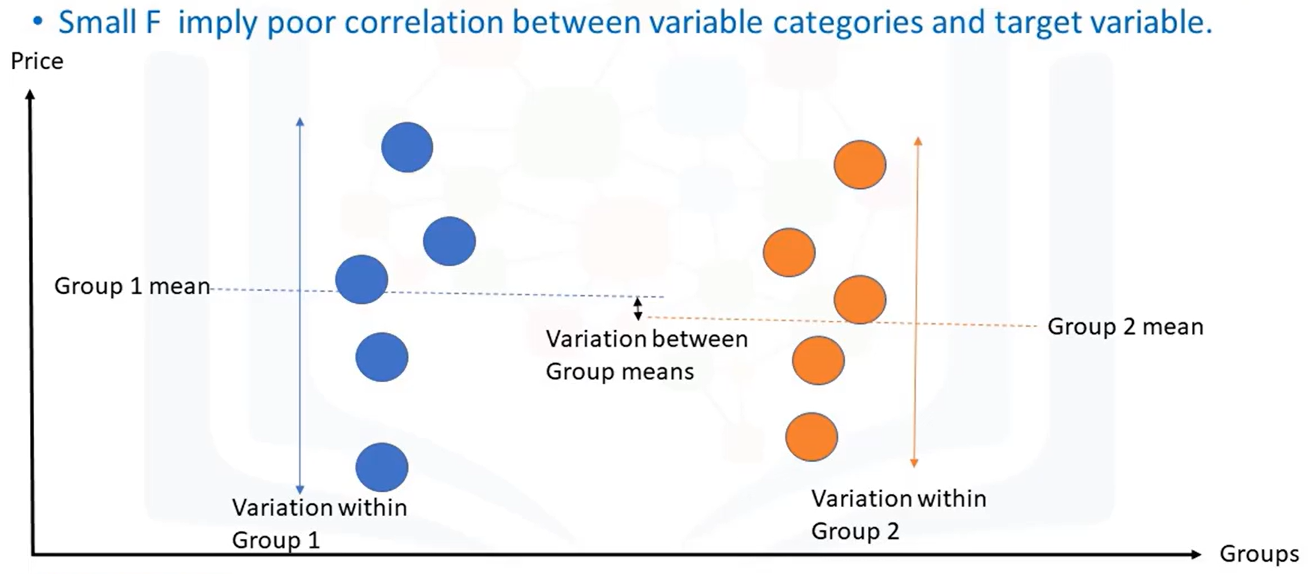

      Looking at this diagram, assume that, group 1 is "Honda" and group 2 is "Subaru";
      both are the make feature categories.
      Since the F-score is small, the correlation between price as the target variable and the
      groupings is weak.

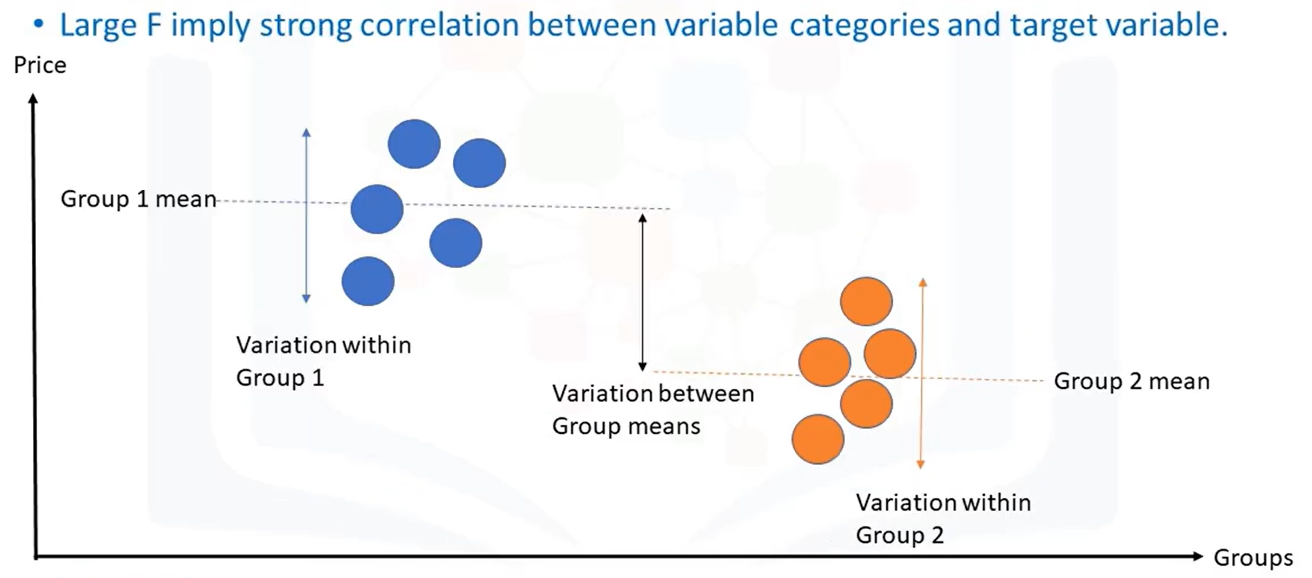

    Assume that group 1 is "Jaguar" and group 2 is "Honda"; both are the Make feature
    categories.
    Since the F-score is large, thus the correlation is strong in this case.

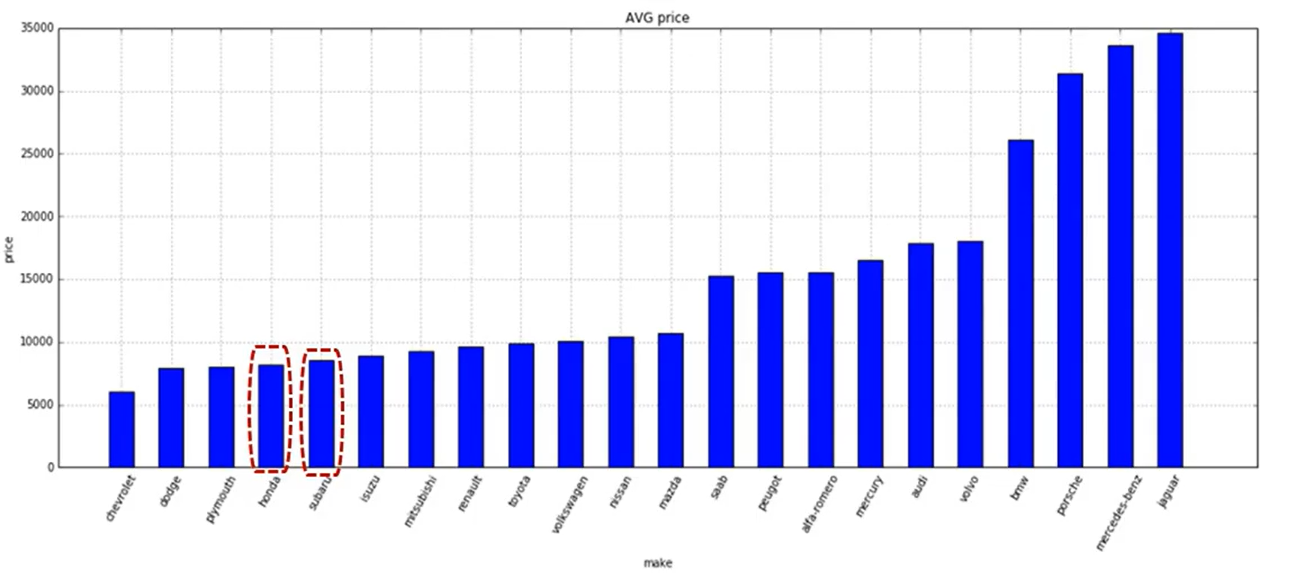

      As we can see from the bar chart, we expect a small F-score between "Hondas" and "Subarus"
      because there is a small difference between the average prices.
      On the other hand, we can expect a large F-value between Hondas and Jaguars because the differences
      between the prices is very significant.

**CALCULATING ANOVA**

      In the first line we extract the make and price data.
      df_anova=df[["make","price"]]

      On the second line we will group the daya by different makes.
      grouped_anova=df_anova.groupb(["make"])

      then we code as follows
      anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])
      

**RESULTS HONDA AND SUBARU**
      
      ANOVA results_ F=0.19744031275, P=F_onewayResult(statistic=.1974430127), pvalue=0.660947824)

      The prices between Hondas and Subarus are not significantly different, as the F-test
      score is less than 1 and p-value is larger than 0.05.

**RESULTS HONDA AND JAGUAR**

      anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"])

      ANOVA results_ F=0.19744031275, P=F_onewayResult(statistic=400.92589), pvalue=1.05861)


      The prices between Hondas and Jaguars are significantly different, since the F-score
      is very large (F = 401) and the p-value is larger than 0.05.
      All in all, we can say that there is a strong correlation between a categorical variable
      and other variables, if the ANOVA test gives us a large F-test value and a small p-value.
      

##Correlation

      Correlation is a statistical metric for measuring to what extent different variables are interdependent.

      In other words, when we look at two variables over time, if one variable changes, how does this effect change in the other variable?

###STRONG POSITIVE CORRELATION

      Observemos la correlacion entre "engine-size" y "price" a traves de un scatterplot y una linea de regresion

      sns.regplot(x="engine-size", y="prices", data=df)
      plt.ylim(0,)

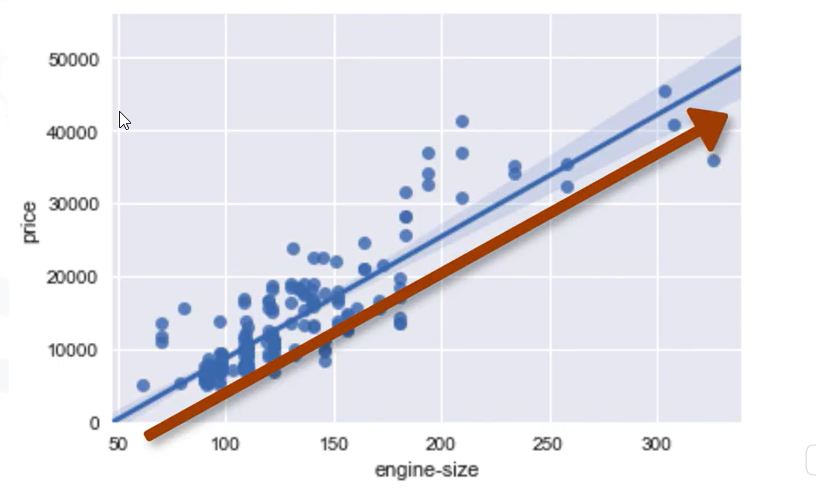

      We can see that the straight line through the data points is very steep,
      which shows that there is a positive linear relationship between the two variables.
      With increase in values of engine size, values of price go up as well and the slope of the
      line is positive, so there is a positive correlation between “engine-size” and “price”.

###STRONG NEGATIVE CORRELATION

      Observemos ahora la correlacion entre "highway-mpg" y "price" a traves de un scatterplot y una linea de regresion

        sns.regplot(x="highway-mpg", y="prices", data=df)
        plt.ylim(0,)

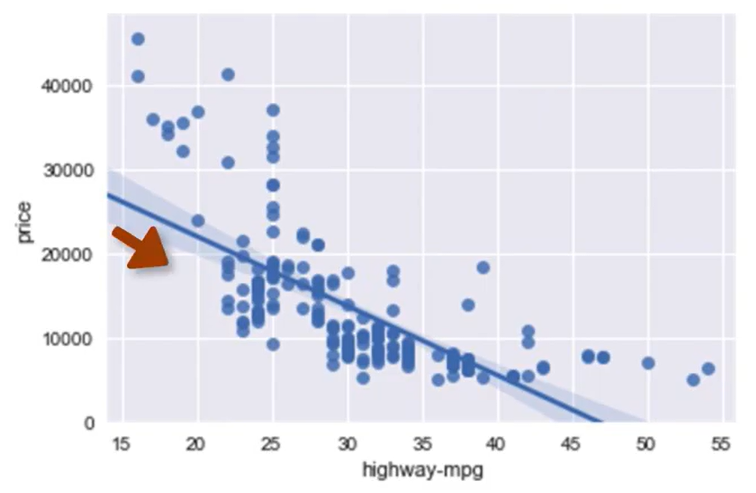

      As we can see in this plot, when highway-mpg value goes up, the value of price goes down,
      therefore there is a negative linear relationship between highway-mpg and price.
      Although this relationship is negative, the slope of the line is steep which means that
      the highway miles per gallon is still a good predictor of price.
      These two variables are said to have a negative correlation.

###WEAK CORRELATION

      Observemos ahora la correlacion entre "peak-rpm" y "price" a traves de un scatterplot y una linea de regresion

        sns.regplot(x="peak-rpm", y="prices", data=df)
        plt.ylim(0,)

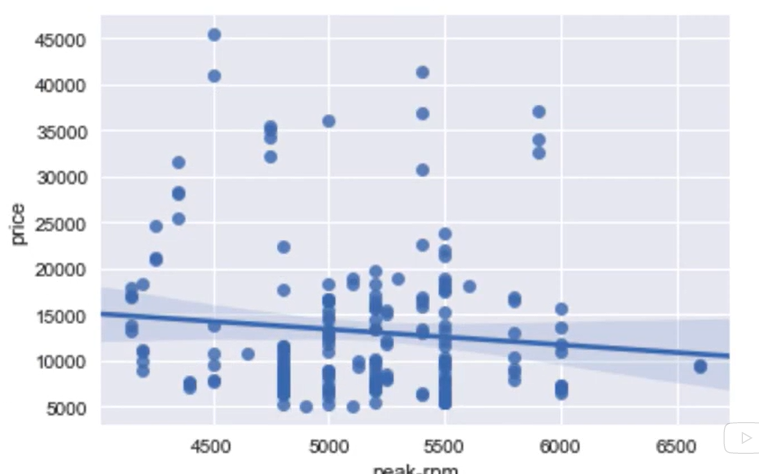

      Finally, we have an example of a weak correlation, for example, both low peak rpm
      and high values of peak rpm have low and high prices, therefore, we cannot use RPM to
      predict the values.

##CORRELATION - STATISTICS

###Pearson Correlation

      One way to measure the strength of the correlation between continuous numerical variables is
      by using a method called Pearson Correlation.
      The Pearson correlation method, will give you two values, the Correlation coefficient
      and the p-value.

        


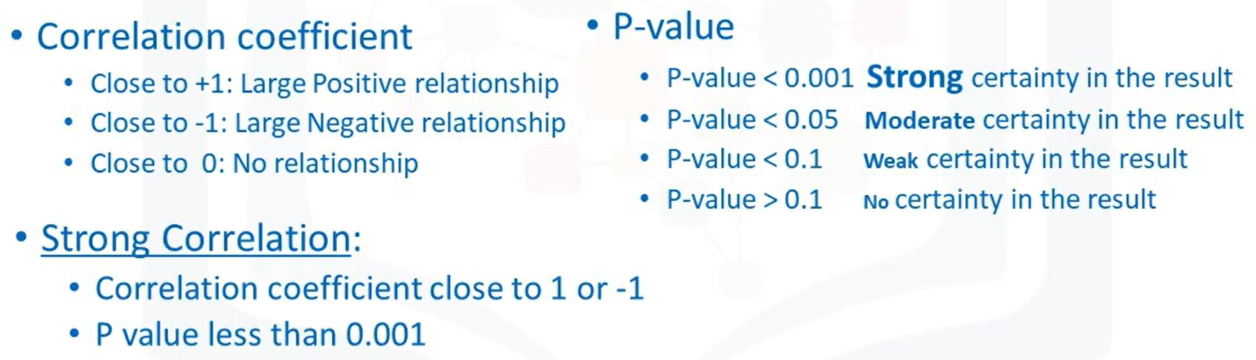

**EXAMPLE WITH DATA SET**


      In this example, we want to look at the correlation between the variables “horsepower” and
      car “price".

      pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price])
          -Pearson correlation: 0.81
          -P-value: p.35 e-48
      STRONG POSITIVE CORRELATION

###Correlation Heatmap

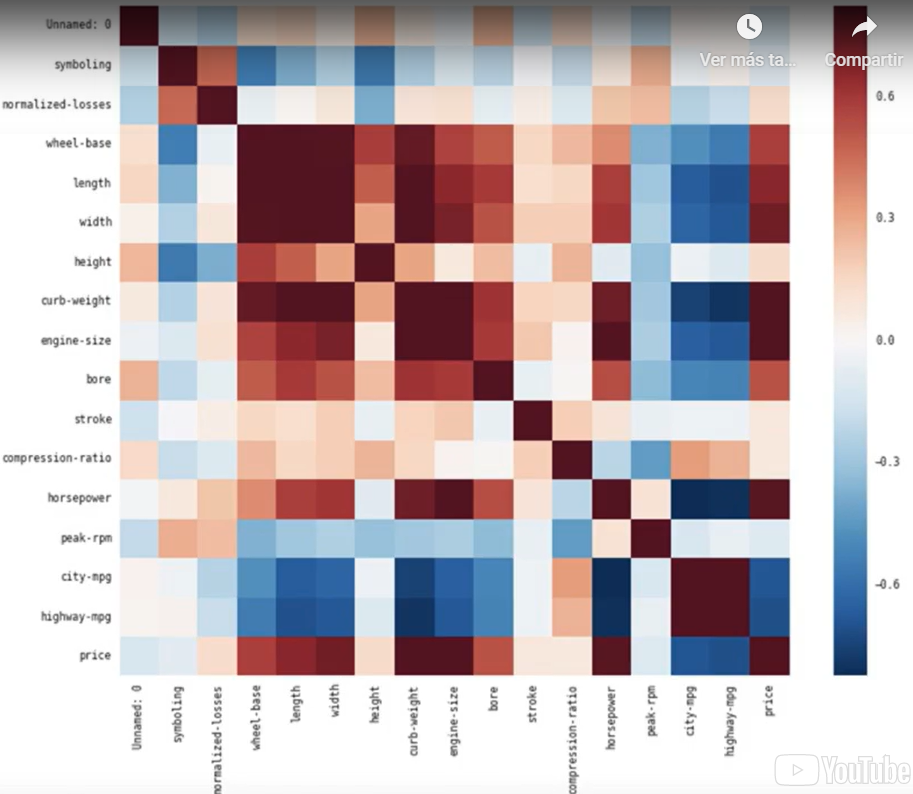